In [1]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

# Plant_ Master

In [2]:
plant_data = pd.read_excel('./Plant_ Master.xlsx')

In [3]:
plant_data.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [4]:
plant_data.shape

(438, 13)

In [5]:
plant_data.isnull().sum()

Plant                        0
Name 1                       0
Valuation Area               0
Customer no. - plant         0
Vendor number plant        436
Factory calendar             0
Name 2                       2
House number and street      2
PO Box                       1
Postal Code                  0
City                         0
Sales organization           5
State                        0
dtype: int64

In [6]:
plant=plant_data.drop(columns=['Vendor number plant', 'Valuation Area', 'Factory calendar', 'Name 2', 'House number and street', 'PO Box', 'Sales organization', 'Customer no. - plant'])
plant.head()

,Plant,Name 1,Postal Code,City,State
0,BC07,NERKUNDRAM,600107,Chennai,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,160055,Mohali,Punjab
2,X001,X001 - AUTO PLANET WHEELS,400610,Thane,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,201010,Ghaziabad,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,560087,Bengaluru,Karnataka


# Customer Data

In [7]:
customer_data = pd.read_excel('./Customer_Data.xlsx', )

In [8]:
customer_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [9]:
customer_data['Occupation'].isnull().sum()

540780

In [10]:
customer_data.shape

(555338, 9)

In [11]:
customer_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [12]:
customer=customer_data.drop(columns = ['Marital Status', 'Date of Birth', 'Death date', 'Business Partner'])
customer.head()

,Customer No.,Partner Type,Data Origin,Title,Occupation
0,1,1.0,Z001,NaN,NaN
1,2,1.0,Z005,NaN,NaN
2,4,1.0,Z005,NaN,NaN
3,5,1.0,Z005,NaN,NaN
4,7,1.0,Z008,NaN,NaN


In [13]:
value = customer_data['Partner Type'].mode()
customer['Partner Type'] = customer_data['Partner Type'].fillna(value[0])

In [14]:
value[0]

1.0

In [15]:
customer['Data Origin'] = customer_data['Data Origin'].fillna(customer_data['Data Origin'].mode()[0])

In [16]:
customer['Title'] = customer_data['Title'].fillna(customer_data['Title'].mode()[0])

In [17]:
customer.isnull().sum()

Customer No.         0
Partner Type         0
Data Origin          0
Title                0
Occupation      540780
dtype: int64

In [18]:
customer['Title'].value_counts()

2.0    530239
1.0     25099
Name: Title, dtype: int64

<AxesSubplot:>

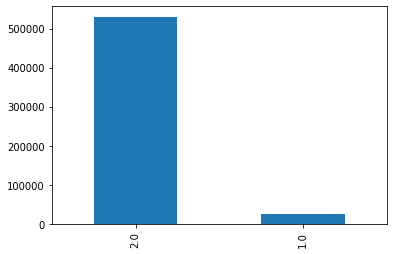

In [19]:
customer['Title'].value_counts().plot(kind='bar')

In [20]:
customer['Data Origin'].value_counts()

Z005    149997
Z006    121660
Z001     63237
Z002     38326
Z004     36801
Z019     29780
Z021     28828
Z018     15382
Z013     13967
Z008     12122
Z016      8118
Z011      8023
Z010      6260
Z017      5685
Z003      5082
Z014      4014
Z012      3840
Z007      2069
Z015       745
Z009       735
Z020       590
Z022        77
Name: Data Origin, dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


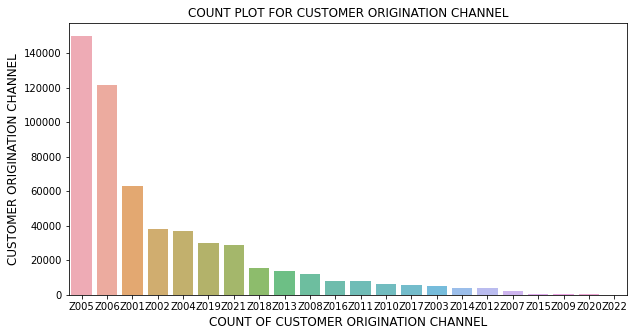

In [22]:
data_origin_count  = customer['Data Origin'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(data_origin_count.index, data_origin_count.values, alpha=0.8)
plt.title('COUNT PLOT FOR CUSTOMER ORIGINATION CHANNEL')
plt.ylabel('CUSTOMER ORIGINATION CHANNEL', fontsize=12)
plt.xlabel('COUNT OF CUSTOMER ORIGINATION CHANNEL', fontsize=12)
plt.show()

# Invoice Data


In [23]:
final_invoice=pd.read_csv('Final_invoice.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
final_invoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [25]:
final_invoice.shape

(492314, 59)

In [26]:
final_invoice.drop(['Amt Rcvd From Custom',"Invoice No",'Claim No.',"Cash /Cashless Type",'Gate Pass Time',
               'CGST(2.5%)','CGST(2.5%)','CGST(6%)',"CGST(14%)","SGST/UGST(14%)","SGST/UGST(2.5%)",
               "SGST/UGST(6%)","SGST/UGST(9%)",'CGST(9%)',"IGST(12%)","IGST(18%)","IGST(28%)","IGST(5%)",
               "Expiry Date","Gate Pass Date","Total CGST","Total GST","Total IGST","Total SGST/UGST","Unnamed: 0",
              'Policy no.','ODN No.',"Outstanding Amt",'Regn No','Service Advisor Name'],axis=1,inplace=True)

In [27]:
final_invoice.shape

(492314, 30)

In [28]:
final_invoice.isnull().sum()

Amt Rcvd From Ins Co    197286
Area / Locality          23890
CITY                         1
Cust Type                    0
Customer No.                 0
District                     0
Insurance Company       468723
Invoice Date                 0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model                     1525
OSL Total                    0
Order Type                   0
Parts Total                  0
Pin code                     0
Plant                        0
Plant Name1                  0
Print Status                 0
Recovrbl Exp                 0
TDS amount              197286
Technician Name         236834
Total Amt Wtd Tax.           0
Total Value             197286
User ID                      0
dtype: int64


# JTD

In [29]:
jtd=pd.read_csv('JTD.csv')
jtd.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [30]:
jtd.shape

(5619484, 10)

In [31]:
jtd.isnull().sum()

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

In [32]:
len(jtd['Description'].unique())

58559

In [33]:
jtd['Description'].value_counts(ascending= False)[:20]

MISC_OTHER CHARGES                270563
Paid Service-Minor                201857
WASHING                           199068
Wheel Alignment                   191211
OIL FILTER                        154387
URANIA SUPREMO CI 4 15W 40        122218
MFC PROLEUM CI4/SL 15W40           92091
AIR FILTER                         80211
Wheel Balancing (5 Wheels)         79970
MISC LABOR 0.5 HOURS               62982
General Check up                   62459
Paid Service-Major                 60369
WINDSHIELD LIQUID WASHER           55352
MISC LABOR 0.25 HOURS              50143
DISTILLED WATER                    46919
Interior & Upholstery Cleaning     44864
REPLACE BRAKE PAD (BOTH SIDE)      38552
PAINTING CHARGES                   34187
MISC LABOR 1 HOUR                  33993
BALANCE WEIGHT 15GRAM              31791
Name: Description, dtype: int64

# analysis

In [34]:
invoice_customer = pd.merge(final_invoice, customer)

In [35]:
invoice_customer.shape

(19727, 34)

In [36]:
print(len(final_invoice['Customer No.'].unique()))
print(final_invoice.shape)

253484
(492314, 30)


In [37]:
print(len(customer['Customer No.'].unique()))
print(customer.shape)

555338
(555338, 5)


In [38]:
invoice_customer_1 = pd.merge(final_invoice, customer,how='left', on='Customer No.')
invoice_customer_1.shape

(492314, 34)

In [39]:
invoice_customer_2 = pd.merge(final_invoice, customer,how='right', on='Customer No.')
invoice_customer_2.shape

(571416, 34)

In [40]:
len(invoice_customer_2['Customer No.'].unique())

555338

In [41]:
# df_customer = pd.DataFrame({
#     'id': [1, 2, 3, 4],
#     'name': ['Tom', 'Jenny', 'James', 'Dan'],
# })
# df_info = pd.DataFrame({
#     'id': [2, 3, 4, 5,4,8],
#     'age': [31, 20, 40,80,50, 70],
#     'sex': ['F', 'M', 'M','M','F', 'F']
# })
# pd.merge(df_customer, df_info,on='id',how="left")

In [42]:
# df_customer = pd.DataFrame({
#     'id': [1,2,3,4],
#     'name': ['Tom', 'Jenny', 'James', 'Dan'],
# })
# df_order_2 = pd.DataFrame({
#     'id': [2, 2, 4, 4,5],
#     'product': ['A', 'B' ,'A', 'C','d'],
#     'quantity': [31, 21, 20,40,20],
    
# })

In [43]:
# pd.merge(df_customer, df_order_2, how='left', on='id')

In [44]:
# pd.merge(df_customer, df_order_2, how='right', on='id')

In [45]:
final_invoice.head()
final_invoice.rename(columns={'Total Amt Wtd Tax.':'Total_Amt_Wtd_Tax'},inplace=True)

In [46]:
final_invoice.shape

(492314, 30)

In [47]:
final_invoice.columns

Index(['Amt Rcvd From Ins Co', 'Area / Locality', 'CITY', 'Cust Type',
       'Customer No.', 'District', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'TDS amount',
       'Technician Name', 'Total_Amt_Wtd_Tax', 'Total Value', 'User ID'],
      dtype='object')

In [48]:
final_invoice.isnull().sum()

Amt Rcvd From Ins Co    197286
Area / Locality          23890
CITY                         1
Cust Type                    0
Customer No.                 0
District                     0
Insurance Company       468723
Invoice Date                 0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model                     1525
OSL Total                    0
Order Type                   0
Parts Total                  0
Pin code                     0
Plant                        0
Plant Name1                  0
Print Status                 0
Recovrbl Exp                 0
TDS amount              197286
Technician Name         236834
Total_Amt_Wtd_Tax            0
Total Value             197286
User ID                      0
dtype: int64

In [49]:
final_invoice[['CITY', 'Cust Type',
       'Customer No.', 'District', 'Insurance Company', 'Invoice Date',
       'Job Card No', 'JobCard Date', 'JobCard Time', 'KMs Reading',
       'Labour Total', 'Make', 'Misc Total', 'Model', 'OSL Total',
       'Order Type', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Print Status', 'Recovrbl Exp',]].head()

,CITY,Cust Type,Customer No.,District,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,...,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp
0,Thane,Retail,67849,Maharashtra,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,...,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0
1,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,173997,2015-01-02,14:12:18,78584,...,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0
2,THANE[W],Retail,81055,Maharashtra,NaN,2015-01-03,173889,2015-01-02,11:40:44,33985,...,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0
3,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,174158,2015-01-03,10:12:32,78584,...,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0
4,THANE,Retail,18980,Maharashtra,NaN,2015-01-03,173860,2015-01-02,10:45:42,50057,...,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0


In [50]:
final_invoice['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


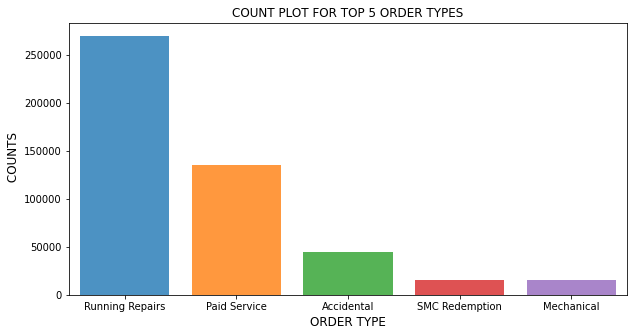

In [51]:
oredr_type_counts  = final_invoice['Order Type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(oredr_type_counts.index[:5], oredr_type_counts.values[:5], alpha=0.8,saturation=50)
plt.title('COUNT PLOT FOR TOP 5 ORDER TYPES')
plt.ylabel(' COUNTS', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.show()

In [52]:
df=final_invoice[final_invoice['District']=='Tamil Nadu']
list(df['CITY'].value_counts().keys())

['CHENNAI',
 'COIMBATORE',
 'NEYVELI',
 'CBE',
 'GUINDY',
 'Chennai',
 'THANJAVUR',
 'chennai',
 'MADURAI',
 'TIRUPUR',
 'chidambaram',
 'AMBUR',
 'TUTICORIN',
 'trichy',
 'PALANI',
 'DHARMAPURI',
 'THIRUVARUR',
 'RANIPET',
 'Salem',
 'POLLACHI',
 'tirunelveli',
 'ERODE',
 'NAGERCOIL',
 'madurai',
 'NAMAKKAL',
 'THIRUVALLUR',
 'SALEM',
 'CHIDAMBARAM',
 'dindigul',
 'TIRUNELVELI',
 'villupuram',
 'coimbatore',
 'Dindigul',
 'salem',
 '.',
 'tuticorin',
 'Dharmapuri',
 'ranipet',
 'Villupuram',
 'Thanjavur',
 'Karur',
 'chengalpet',
 'CHENGALPATTU',
 'Tirupur',
 'RAMANATHAPURAM',
 'thanjavur',
 'C.P.T',
 'VANIYAMBADI',
 'karur',
 'VELLORE',
 'neyveli',
 'PANRUTI',
 'Chidambaram',
 'KANCHIPURAM',
 'CHEENAI',
 'chennai.',
 'NAGAPATTINAM',
 'tirupur',
 'CUDDALORE',
 'UDUMALPET',
 'THIRUMANGALAM',
 'M.CITY',
 'KARUR',
 'PUDUKKOTTAI',
 'TRICHY',
 'hosur',
 'Ambur',
 'dharmapuri',
 'Trichy',
 'POLLACHI.',
 'NERKUNDRAM',
 'VILLUPURAM',
 'VIRUTHUNAGAR',
 'NEYVELI-TS',
 'thirumangalam',
 'AMBATTU

In [53]:
district_counts=final_invoice['District'].value_counts()[:5]
district_counts

Maharashtra       128119
Tamil Nadu        116309
Karnataka          44135
Andhra Pradesh     40604
Uttar Pradesh      31534
Name: District, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


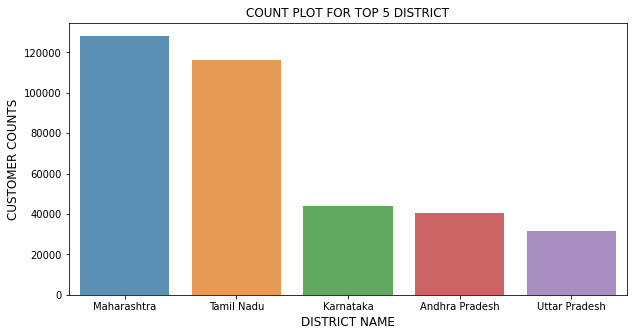

In [54]:
district_counts  = final_invoice['District'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(district_counts.index[:5], district_counts.values[:5], alpha=0.8)
plt.title('COUNT PLOT FOR TOP 5 DISTRICT')
plt.ylabel('CUSTOMER COUNTS', fontsize=12)
plt.xlabel('DISTRICT NAME', fontsize=12)
plt.show()

In [55]:
final_invoice['District'].value_counts()[-5:]

Lakshadweep    7
Sikkim         6
Tripura        5
Manipur        3
Mizoram        2
Name: District, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


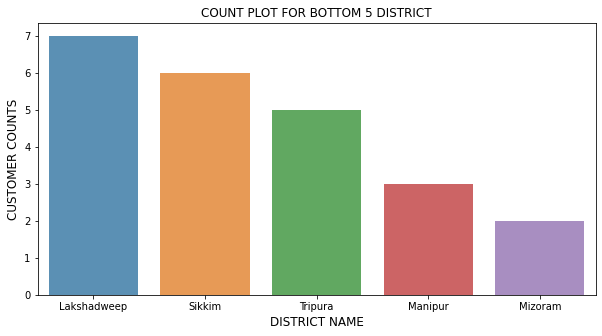

In [56]:
district_counts  = final_invoice['District'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(district_counts.index[-5:], district_counts.values[-5:], alpha=0.8)
plt.title('COUNT PLOT FOR BOTTOM 5 DISTRICT')
plt.ylabel('CUSTOMER COUNTS', fontsize=12)
plt.xlabel('DISTRICT NAME', fontsize=12)
plt.show()

In [57]:
df=final_invoice.loc[final_invoice['Order Type'].isin(['WBW Order','Workshop Damage'])]
# df=final_invoice[final_invoice['Order Type']=='WBW Order','Workshop Damage']
df.groupby(['District','Order Type']).size()


District          Order Type     
Chandigarh        WBW Order          1
Gujarat           Workshop Damage    3
Haryana           WBW Order          1
                  Workshop Damage    1
Himachal Pradesh  WBW Order          2
Kerala            Workshop Damage    1
Madhya Pradesh    WBW Order          1
Maharashtra       WBW Order          1
                  Workshop Damage    8
Punjab            WBW Order          5
Rajasthan         WBW Order          3
Tamil Nadu        Workshop Damage    3
Telangana         Workshop Damage    1
Uttar Pradesh     WBW Order          1
Uttarakhand       WBW Order          2
dtype: int64

In [58]:
df=final_invoice.loc[final_invoice.District.isin(['Maharashtra','Tamil Nadu','Karnataka','Andhra Pradesh','Uttar Pradesh'])]
df.groupby(['District','Order Type']).size()

District        Order Type       
Andhra Pradesh  Accidental            4372
                Mechanical             830
                Paid Service         10112
                Repeat Order           102
                Running Repairs      23302
                SMC Redemption        1147
                SMC Value Package      739
Karnataka       Accidental            3792
                Mechanical            2037
                Paid Service         10601
                Repeat Order           246
                Running Repairs      26419
                SMC Redemption         555
                SMC Value Package      485
Maharashtra     Accidental            9874
                Mechanical            3182
                Paid Service         43842
                Repeat Order          1049
                Running Repairs      60811
                SMC Redemption        5812
                SMC Value Package     3540
                WBW Order                1
                Work

In [59]:
final_invoice['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

In [60]:
df=final_invoice.loc[final_invoice.District.isin(['Maharashtra','Tamil Nadu','Karnataka','Andhra Pradesh','Uttar Pradesh'])]
df=df.loc[df['Order Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]
df.groupby(['District','Order Type']).size()
# df['Order Type'].value_counts()
# df['District'].value_counts()

District        Order Type     
Andhra Pradesh  Accidental          4372
                Mechanical           830
                Paid Service       10112
                Running Repairs    23302
                SMC Redemption      1147
Karnataka       Accidental          3792
                Mechanical          2037
                Paid Service       10601
                Running Repairs    26419
                SMC Redemption       555
Maharashtra     Accidental          9874
                Mechanical          3182
                Paid Service       43842
                Running Repairs    60811
                SMC Redemption      5812
Tamil Nadu      Accidental         11530
                Mechanical          3996
                Paid Service       28607
                Running Repairs    69584
                SMC Redemption      1392
Uttar Pradesh   Accidental          2101
                Mechanical           254
                Paid Service        7723
                Running R

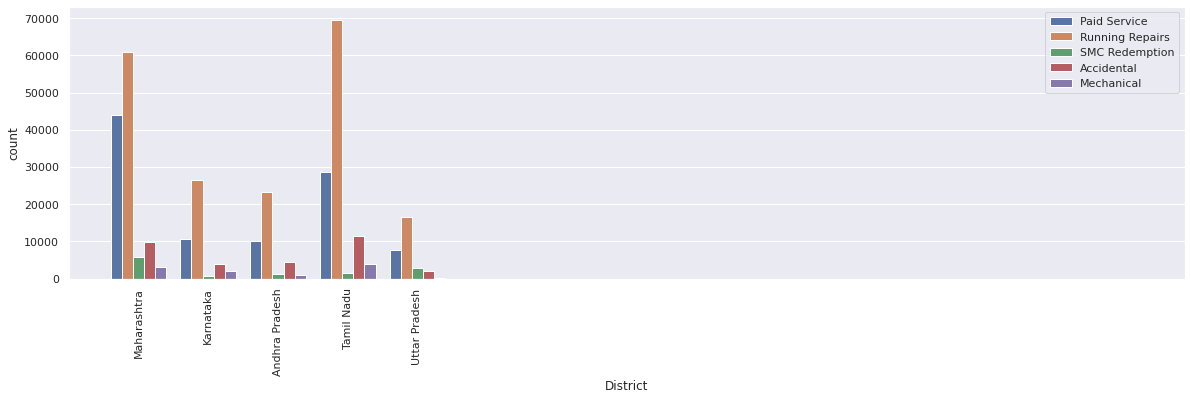

In [61]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="District", data=df, hue='Order Type')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

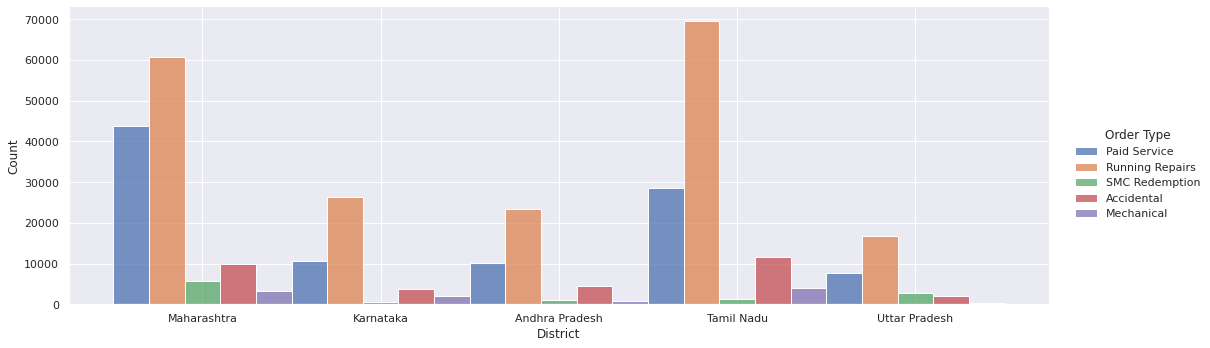

In [62]:
sns.displot(df, x="District", hue="Order Type",multiple="dodge",aspect=3)

In [63]:
df.groupby(['District','Order Type']).size().unstack()

Order Type,Accidental,Mechanical,Paid Service,Running Repairs,SMC Redemption
District,,,,,
Andhra Pradesh,4372,830,10112,23302,1147
Karnataka,3792,2037,10601,26419,555
Maharashtra,9874,3182,43842,60811,5812
Tamil Nadu,11530,3996,28607,69584,1392
Uttar Pradesh,2101,254,7723,16657,2719


In [64]:
final_invoice.columns

Index(['Amt Rcvd From Ins Co', 'Area / Locality', 'CITY', 'Cust Type',
       'Customer No.', 'District', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'TDS amount',
       'Technician Name', 'Total_Amt_Wtd_Tax', 'Total Value', 'User ID'],
      dtype='object')

# order and amount

In [65]:
a=final_invoice.groupby('Order Type')['Total_Amt_Wtd_Tax'].count()
a

Order Type
Accidental            44159
Mechanical            15100
Paid Service         135004
Repeat Order           3043
Running Repairs      269455
SMC Redemption        15738
SMC Value Package      9781
WBW Order                17
Workshop Damage          17
Name: Total_Amt_Wtd_Tax, dtype: int64

In [66]:
a.sort_values( ascending=False)

Order Type
Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
Workshop Damage          17
WBW Order                17
Name: Total_Amt_Wtd_Tax, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


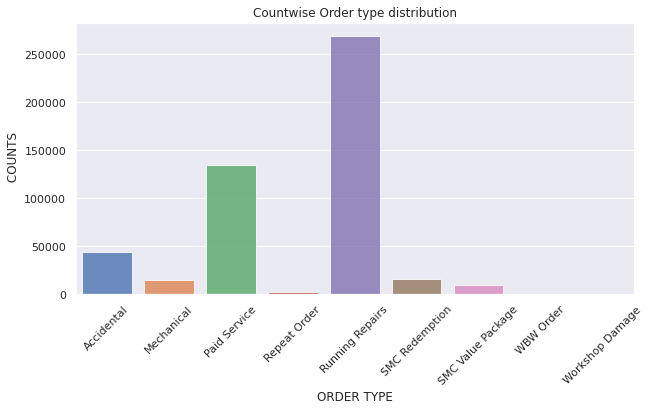

In [67]:
a=final_invoice.groupby('Order Type')['Total_Amt_Wtd_Tax'].count()
plt.figure(figsize=(10,5))
sns.barplot(a.index, a.values, alpha=0.8,saturation=50)
plt.title('Countwise Order type distribution')
plt.ylabel(' COUNTS', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [68]:
b=final_invoice.groupby('Order Type')['Total_Amt_Wtd_Tax'].sum()
b

Order Type
Accidental           7.554651e+08
Mechanical           4.745552e+07
Paid Service         6.451709e+08
Repeat Order         4.006740e+03
Running Repairs      6.787316e+08
SMC Redemption       1.674224e+06
SMC Value Package    3.507968e+07
WBW Order            1.312780e+05
Workshop Damage      0.000000e+00
Name: Total_Amt_Wtd_Tax, dtype: float64

In [69]:
b.sort_values( ascending=False)

Order Type
Accidental           7.554651e+08
Running Repairs      6.787316e+08
Paid Service         6.451709e+08
Mechanical           4.745552e+07
SMC Value Package    3.507968e+07
SMC Redemption       1.674224e+06
WBW Order            1.312780e+05
Repeat Order         4.006740e+03
Workshop Damage      0.000000e+00
Name: Total_Amt_Wtd_Tax, dtype: float64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


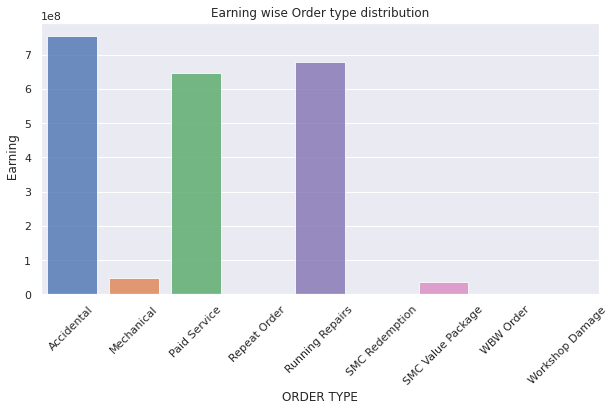

In [70]:
b=final_invoice.groupby('Order Type')['Total_Amt_Wtd_Tax'].sum()
plt.figure(figsize=(10,5))
sns.barplot(b.index, b.values, alpha=0.8,saturation=50)
plt.title('Earning wise Order type distribution')
plt.ylabel(' Earning', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [71]:
zero_amt=final_invoice[final_invoice['Total_Amt_Wtd_Tax']==0]
a=zero_amt['District'].value_counts().sort_values( ascending=False)
a

Maharashtra             14976
Uttar Pradesh            6946
Tamil Nadu               6363
Punjab                   3926
Karnataka                3766
Haryana                  3216
Gujarat                  2916
Andhra Pradesh           2724
Madhya Pradesh           1681
Rajasthan                1563
Delhi                    1176
Telangana                 598
Himachal Pradesh          424
Chandigarh                418
Uttarakhand               326
Bihar                     275
Chhattisgarh              174
Odisha                    170
Kerala                    145
Dadra and Nagar Hav.      131
West Bengal                97
Puducherry                 73
Daman and Diu              56
Jharkhand                   9
Arunachal Pradesh           7
Goa                         2
Nagaland                    2
Assam                       1
Megalaya                    1
Jammu and Kashmir           1
Name: District, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


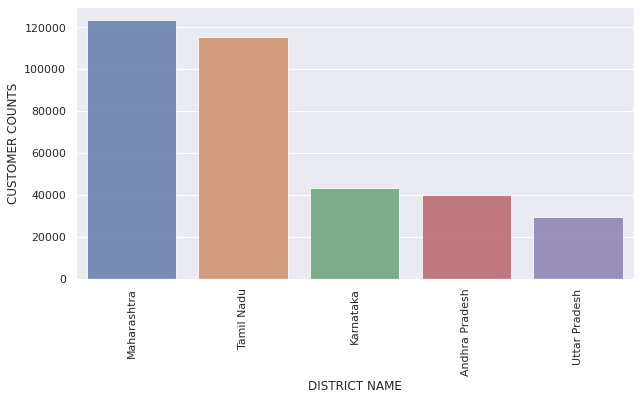

In [72]:
a  = df['District'].value_counts().sort_values( ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(a.index, a.values, alpha=0.8)

plt.ylabel('CUSTOMER COUNTS', fontsize=12)
plt.xlabel('DISTRICT NAME', fontsize=12)
plt.xticks(rotation=90)
plt.show()

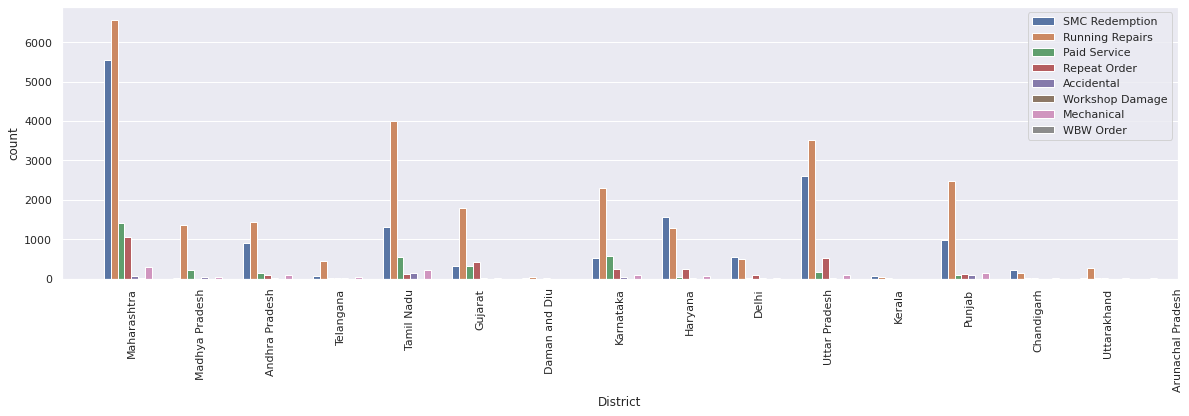

In [73]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="District", data=zero_amt, hue='Order Type')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [74]:
zero_amt['Order Type'].value_counts()

Running Repairs    28574
SMC Redemption     14738
Paid Service        3894
Repeat Order        3041
Mechanical          1369
Accidental           529
Workshop Damage       17
WBW Order              1
Name: Order Type, dtype: int64

In [75]:
final_invoice.columns


Index(['Amt Rcvd From Ins Co', 'Area / Locality', 'CITY', 'Cust Type',
       'Customer No.', 'District', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'TDS amount',
       'Technician Name', 'Total_Amt_Wtd_Tax', 'Total Value', 'User ID'],
      dtype='object')

In [76]:
final_invoice.columns

Index(['Amt Rcvd From Ins Co', 'Area / Locality', 'CITY', 'Cust Type',
       'Customer No.', 'District', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'TDS amount',
       'Technician Name', 'Total_Amt_Wtd_Tax', 'Total Value', 'User ID'],
      dtype='object')

In [77]:
len(final_invoice[final_invoice['Total_Amt_Wtd_Tax']<0])

8

In [78]:
len(final_invoice[final_invoice['Total Value']<0])

0

In [79]:
final_invoice['Total_Amt_Wtd_Tax'].sum()

2163712371.2599998

In [80]:
final_invoice['Total Value'].sum()

1303469601.4299998

In [81]:
len(final_invoice[final_invoice['Total_Amt_Wtd_Tax']==0])

52163

In [82]:
len(final_invoice[final_invoice['Total Value']==0])

33460

In [83]:
customer_data.shape

(555338, 9)

In [84]:
final_invoice.shape

(492314, 30)

In [85]:
jtd['Description'].value_counts()[:]

MISC_OTHER CHARGES                 270563
Paid Service-Minor                 201857
WASHING                            199068
Wheel Alignment                    191211
OIL FILTER                         154387
                                    ...  
DRIVESHAFT ASSY RIGHT I20,VERNA         1
OIL FILTER Indigo - Taxi Spl            1
GEAR,MAIN SHAFT REV                     1
SLIDING GLASS ASSY FRONT RH             1
PLATE, LUGGAGE COM D                    1
Name: Description, Length: 58558, dtype: int64

In [86]:
final_invoice.columns

Index(['Amt Rcvd From Ins Co', 'Area / Locality', 'CITY', 'Cust Type',
       'Customer No.', 'District', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'TDS amount',
       'Technician Name', 'Total_Amt_Wtd_Tax', 'Total Value', 'User ID'],
      dtype='object')

In [87]:
final_invoice["Insurance Company"].value_counts()

THE NEW INDIA ASSURANCE CO. LTD.       5401
NATIONAL INSURANCE COMPANY LIMITED     3233
UNITED INDIA INSURANCE CO. LTD         2405
RELIANCE GENERAL INSURANCE COMPANY     1812
ICICI LOMBARD CUSTOMER DUES            1646
Oriental Insurance Company Ltd.        1289
BHARTI AXA GENRERAL INSURANCE          1226
BAJAJ ALLIANZE GENERAL INSURANCE CO     960
UNIVERSAL SOMPO GENERAL INSURANCE C     844
IFFCOTOKIO GENERAL INSURANCE            805
TATA AIG GENERAL INSURANCE CO. LTD.     791
HDFC ERGO                               730
CHOLAMANDALAM GENERAL INSURANCE CO.     683
ROYAL SUNDARAM GENERAL                  490
Future Generali India Ins. Co Ltd       413
SBI General Insurance Company Ltd.      328
L&T INSURANCE                           232
Magma HDI General Insurance Co Ltd      110
Kotak Mahindra General Insurance Lt      69
LIBERTY VIDEOCON GENERAL INSURANCE       65
Corporate Warranties India Pvt. Ltd      59
Name: Insurance Company, dtype: int64

In [88]:
final_invoice["Insurance Company"].isnull().sum()

468723

In [89]:
final_invoice["Insurance Company"].notnull().sum()

23591

In [90]:
df=final_invoice[final_invoice["Total_Amt_Wtd_Tax"]==0 & final_invoice["Insurance Company"].notnull()]
df.shape

(52163, 30)

# km

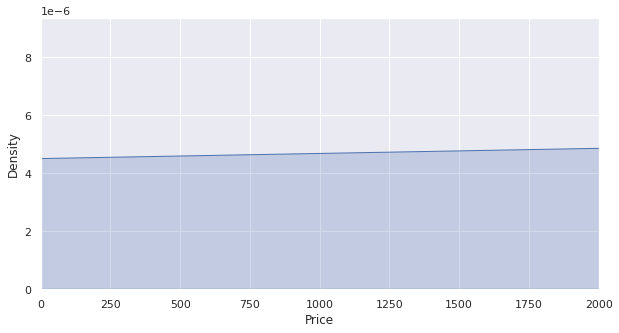

In [91]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(final_invoice['KMs Reading'],shade=True)
plt.show()

In [92]:
final_invoice.head()

,Amt Rcvd From Ins Co,Area / Locality,CITY,Cust Type,Customer No.,District,Insurance Company,Invoice Date,Invoice Time,Job Card No,...,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,TDS amount,Technician Name,Total_Amt_Wtd_Tax,Total Value,User ID
0,0.0,MAJIWADA,Thane,Retail,67849,Maharashtra,NaN,2015-01-02,11:30:36,168303,...,400601,BC01,THANE,NO,0.0,0.0,RUPESH,4051.95,4051.95,BC01FS1
1,0.0,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,10:07:32,173997,...,400603,BC01,THANE,NO,0.0,0.0,PRASHANT,1001.29,1001.29,BC01SA2
2,0.0,THANE,THANE[W],Retail,81055,Maharashtra,NaN,2015-01-03,11:12:57,173889,...,400607,BC01,THANE,NO,0.0,0.0,IMRAN,233.14,233.14,BC01SA2
3,0.0,THNAE,THNAE,Retail,84419,Maharashtra,NaN,2015-01-03,11:40:44,174158,...,400603,BC01,THANE,NO,0.0,0.0,PRASHANT,0.00,0.00,BC01SA2
4,0.0,THANE,THANE,Retail,18980,Maharashtra,NaN,2015-01-03,12:07:17,173860,...,400603,BC01,THANE,NO,0.0,0.0,DAYANAND,2747.12,2747.12,BC01SA2


In [93]:
final_invoice.columns

Index(['Amt Rcvd From Ins Co', 'Area / Locality', 'CITY', 'Cust Type',
       'Customer No.', 'District', 'Insurance Company', 'Invoice Date',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'TDS amount',
       'Technician Name', 'Total_Amt_Wtd_Tax', 'Total Value', 'User ID'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='month'>

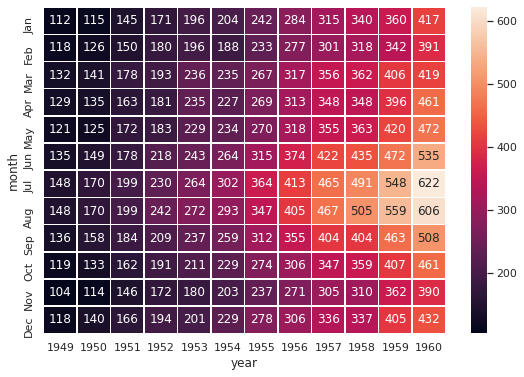

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [95]:
final_invoice['Make'].value_counts()

MARUTI SUZUKI           147102
MAHINDRA &  MAHINDRA     87356
HYUNDAI                  85342
TATA MOTORS              58034
GENERAL MOTORS           29092
FORD                     21616
TOYOTA                   19466
HONDA                    15464
SKODA                     6515
FIAT                      6437
VOLKSWAGEN                6150
RENAULT                   3429
NISSAN                    3090
MITSUBISHI MOTORS         1427
DAEWOO                     392
BMW                        257
MERCEDES BENZ              256
AUDI                       220
HINDUSTAN MOTORS           219
FORCE                      207
PREMIER AUTOMOBILES         93
SONALIKA                    87
LAND ROVER                  21
VOLVO                       19
SAN MOTORS                   8
JEEP                         7
PORCHE                       6
MORRIS                       2
Name: Make, dtype: int64

In [96]:
final_invoice['Model'].isnull().sum()

1525

In [97]:
len(final_invoice['Model'].unique())

246

# prob 2

In [98]:
final_invoice=pd.read_csv('cleaned_finalinvoice.csv')
final_invoice.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Cust Type,Customer No.,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,...,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,City,State,Year,Month
0,0,Retail,67849,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,1203.14,...,4051.95000,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,thane,maharashtra,2014,12
1,1,Retail,84419,NaN,2015-01-03,173997,2015-01-02,14:12:18,78584,804.26,...,1001.29000,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,thane,maharashtra,2015,1
2,2,Retail,81055,NaN,2015-01-03,173889,2015-01-02,11:40:44,33985,180.19,...,233.14000,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,thane,maharashtra,2015,1
3,3,Retail,84419,NaN,2015-01-03,174158,2015-01-03,10:12:32,78584,0.00,...,1674.22433,1644.70,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,thane,maharashtra,2015,1
4,4,Retail,18980,NaN,2015-01-03,173860,2015-01-02,10:45:42,50057,1202.97,...,2747.12000,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,thane,maharashtra,2015,1


In [99]:
final_invoice = final_invoice.rename(columns={'Total Amt Wtd Tax.': 'Total_Amt_Wtd_Tax','Labour Total':'Labour_Total'})

In [100]:
final_invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Insurance Company',
       'Invoice Date', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour_Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Technician Name',
       'Total_Amt_Wtd_Tax', 'Total Value', 'User ID', 'Invoice_DateTime',
       'JobCard_DateTime', 'Service_Time', 'City', 'State', 'Year', 'Month'],
      dtype='object')

In [101]:
final_invoice['Order Type'].value_counts()

Running Repairs      265365
Paid Service         129352
Accidental            43043
SMC Redemption        15603
Mechanical            14809
SMC Value Package      9693
Repeat Order             27
Workshop Damage          17
WBW Order                16
Name: Order Type, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


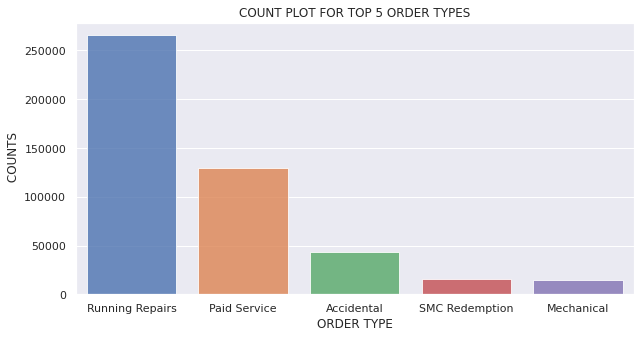

In [102]:

oredr_type_counts  = final_invoice['Order Type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(oredr_type_counts.index[:5], oredr_type_counts.values[:5], alpha=0.8,saturation=50)
plt.title('COUNT PLOT FOR TOP 5 ORDER TYPES')
plt.ylabel(' COUNTS', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.show()

In [103]:
district_counts=final_invoice['State'].value_counts()[:5]
district_counts

maharashtra      124717
tamil nadu       113588
karnataka         42781
uttar pradesh     30480
telangana         30013
Name: State, dtype: int64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


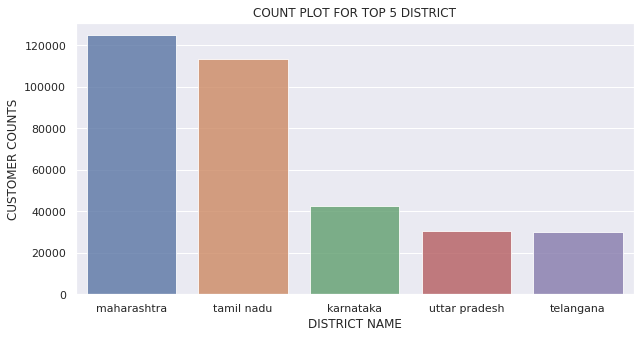

In [104]:
district_counts  = final_invoice['State'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(district_counts.index[:5], district_counts.values[:5], alpha=0.8)
plt.title('COUNT PLOT FOR TOP 5 DISTRICT')
plt.ylabel('CUSTOMER COUNTS', fontsize=12)
plt.xlabel('DISTRICT NAME', fontsize=12)
plt.show()

In [105]:
df=final_invoice.loc[final_invoice.State.isin(['maharashtra','tamil nadu','karnataka','uttar pradesh','telangana'])]
df=df.loc[df['Order Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]
df.groupby(['State','Order Type']).size()
# df['Order Type'].value_counts()
# df['District'].value_counts()

State          Order Type     
karnataka      Accidental          3761
               Mechanical          2002
               Paid Service        9924
               Running Repairs    26063
               SMC Redemption       551
maharashtra    Accidental          9685
               Mechanical          3151
               Paid Service       42194
               Running Repairs    60394
               SMC Redemption      5763
tamil nadu     Accidental         11148
               Mechanical          3895
               Paid Service       27658
               Running Repairs    68450
               SMC Redemption      1377
telangana      Accidental          3523
               Mechanical           661
               Paid Service        8628
               Running Repairs    15829
               SMC Redemption       819
uttar pradesh  Accidental          2041
               Mechanical           258
               Paid Service        7516
               Running Repairs    16459
         

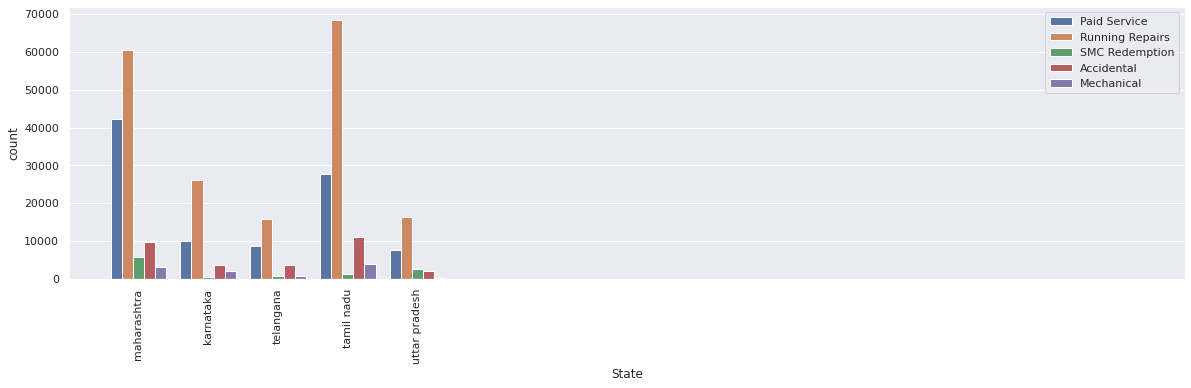

In [106]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="State", data=df, hue='Order Type')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

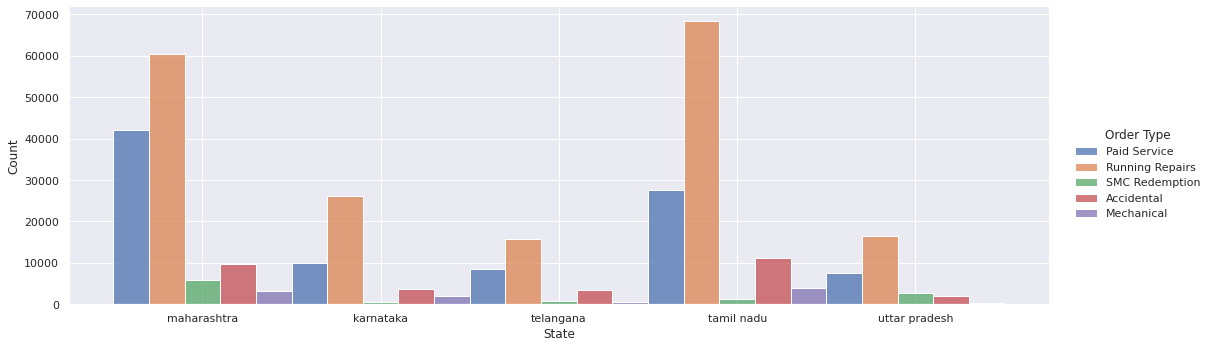

In [107]:
sns.displot(df, x="State", hue="Order Type",multiple="dodge",aspect=3)

In [108]:
b=final_invoice.groupby('Order Type')['Total_Amt_Wtd_Tax'].sum()
b.sort_values( ascending=False)

Order Type
Running Repairs      7.437225e+08
Accidental           7.414487e+08
Paid Service         6.351207e+08
Mechanical           5.058641e+07
SMC Value Package    3.471724e+07
SMC Redemption       2.564956e+07
WBW Order            1.312780e+05
Repeat Order         4.006740e+03
Workshop Damage      0.000000e+00
Name: Total_Amt_Wtd_Tax, dtype: float64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


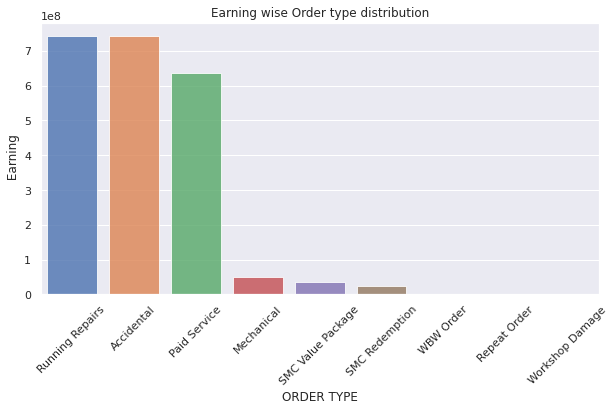

In [109]:
b=final_invoice.groupby('Order Type')['Total_Amt_Wtd_Tax'].sum().sort_values( ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(b.index, b.values, alpha=0.8,saturation=50)
plt.title('Earning wise Order type distribution')
plt.ylabel(' Earning', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


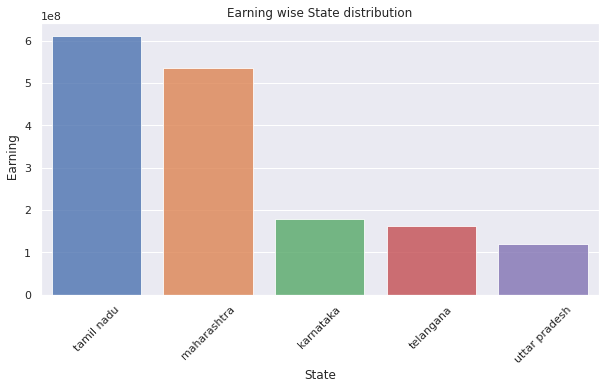

In [110]:
a=final_invoice.groupby('State')['Total_Amt_Wtd_Tax'].sum().sort_values( ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(a.index[:5], a.values[:5], alpha=0.8,saturation=50)
plt.title('Earning wise State distribution')
plt.ylabel(' Earning', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


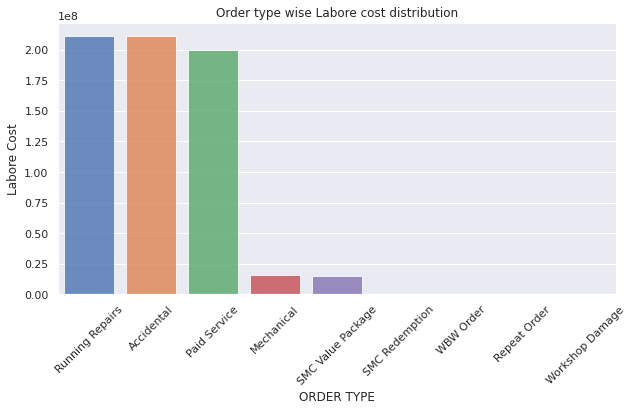

In [111]:
b=final_invoice.groupby('Order Type')['Labour_Total'].sum().sort_values( ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(b.index, b.values, alpha=0.8,saturation=50)
plt.title('Order type wise Labore cost distribution')
plt.ylabel('Labore Cost', fontsize=12)
plt.xlabel('ORDER TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

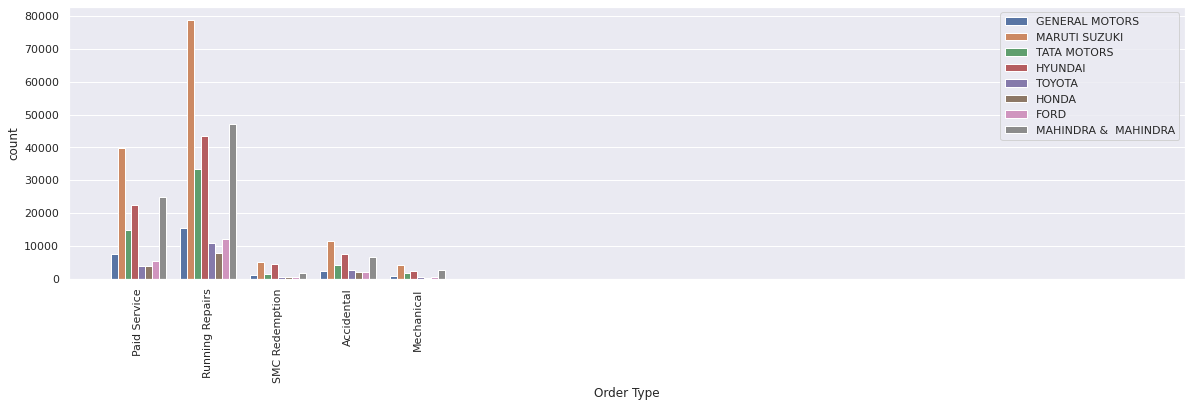

In [112]:
df=final_invoice.loc[final_invoice['Order Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]
df=df.loc[df['Make'].isin(['MARUTI SUZUKI', 'MAHINDRA &  MAHINDRA', 'HYUNDAI', 'TATA MOTORS',
       'GENERAL MOTORS', 'FORD', 'TOYOTA', 'HONDA'])]

# df=df.loc[df.State.isin(['maharashtra','tamil nadu','karnataka','uttar pradesh','telangana'])]


sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Order Type", data=df, hue='Make')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [113]:
df.groupby(['Order Type','Make']).size()

Order Type       Make                
Accidental       FORD                     2196
                 GENERAL MOTORS           2316
                 HONDA                    2067
                 HYUNDAI                  7698
                 MAHINDRA &  MAHINDRA     6697
                 MARUTI SUZUKI           11548
                 TATA MOTORS              4195
                 TOYOTA                   2748
Mechanical       FORD                      654
                 GENERAL MOTORS            853
                 HONDA                     386
                 HYUNDAI                  2396
                 MAHINDRA &  MAHINDRA     2771
                 MARUTI SUZUKI            4332
                 TATA MOTORS              1745
                 TOYOTA                    643
Paid Service     FORD                     5426
                 GENERAL MOTORS           7687
                 HONDA                    3790
                 HYUNDAI                 22453
                 MAHIN

# -Which service is popular regarding a certain make/car?

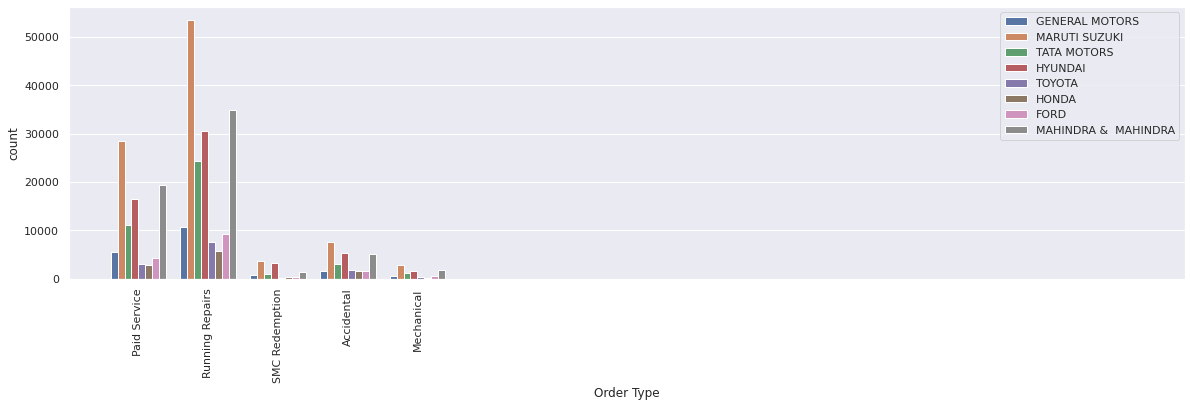

In [114]:
df=final_invoice.loc[final_invoice['Order Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]
df=df.loc[df['Make'].isin(['MARUTI SUZUKI', 'MAHINDRA &  MAHINDRA', 'HYUNDAI', 'TATA MOTORS',
       'GENERAL MOTORS', 'FORD', 'TOYOTA', 'HONDA'])]

df=df.loc[df.State.isin(['maharashtra','tamil nadu','karnataka','uttar pradesh','telangana'])]


sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Order Type", data=df, hue='Make')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

In [115]:
df.groupby(['Order Type','Make']).size()

Order Type       Make                
Accidental       FORD                     1705
                 GENERAL MOTORS           1604
                 HONDA                    1610
                 HYUNDAI                  5293
                 MAHINDRA &  MAHINDRA     5041
                 MARUTI SUZUKI            7585
                 TATA MOTORS              3075
                 TOYOTA                   1859
Mechanical       FORD                      504
                 GENERAL MOTORS            610
                 HONDA                     252
                 HYUNDAI                  1592
                 MAHINDRA &  MAHINDRA     1856
                 MARUTI SUZUKI            2764
                 TATA MOTORS              1269
                 TOYOTA                    460
Paid Service     FORD                     4317
                 GENERAL MOTORS           5574
                 HONDA                    2880
                 HYUNDAI                 16560
                 MAHIN

# for top state year Amt(make/oredr)

In [116]:
df.Make.unique()

array(['GENERAL MOTORS', 'MARUTI SUZUKI', 'TATA MOTORS', 'HYUNDAI',
       'TOYOTA', 'HONDA', 'FORD', 'MAHINDRA &  MAHINDRA'], dtype=object)

In [117]:
df.State.unique()

array(['maharashtra', 'karnataka', 'telangana', 'tamil nadu',
       'uttar pradesh'], dtype=object)

In [118]:
df['Order Type'].unique()

array(['Paid Service', 'Running Repairs', 'SMC Redemption', 'Accidental',
       'Mechanical'], dtype=object)

In [119]:
df1=df.groupby(['Year','Order Type']).Total_Amt_Wtd_Tax.sum().unstack()
df1

Order Type,Accidental,Mechanical,Paid Service,Running Repairs,SMC Redemption
Year,,,,,
2012,1.824955e+07,NaN,4.485999e+07,2.010779e+07,NaN
2013,5.265962e+07,NaN,5.946169e+07,6.979237e+07,1.355135e+06
2014,7.852073e+07,NaN,7.335071e+07,1.352552e+08,7.390026e+06
2015,1.541399e+08,311145.84,1.307117e+08,1.354959e+08,6.986538e+06
2016,1.479333e+08,33990269.86,1.537877e+08,1.626224e+08,2.439345e+06


<AxesSubplot:xlabel='Year'>

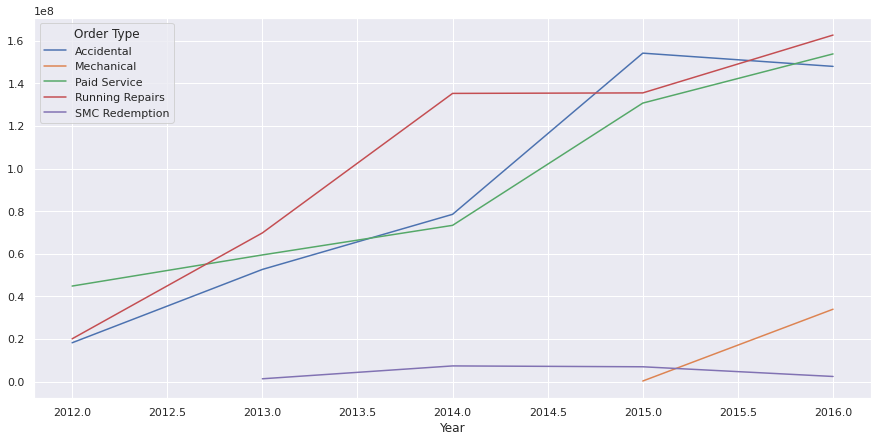

In [120]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['Year','Order Type']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)

<AxesSubplot:xlabel='Month'>

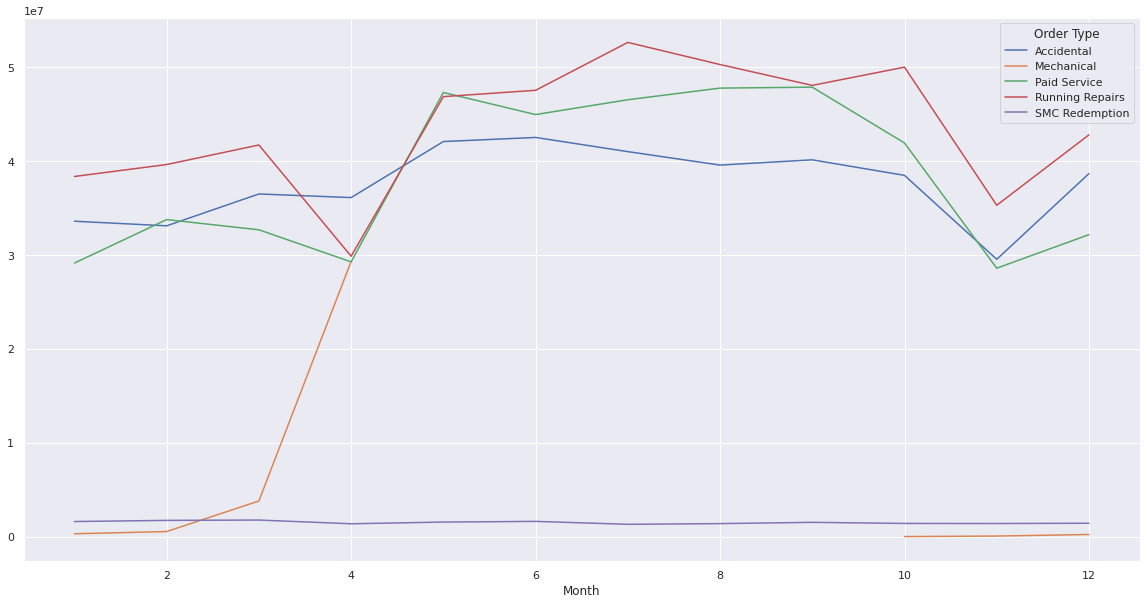

In [121]:
fig, ax = plt.subplots(figsize=(20,10))

df.groupby(['Month','Order Type']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)

<AxesSubplot:xlabel='Year'>

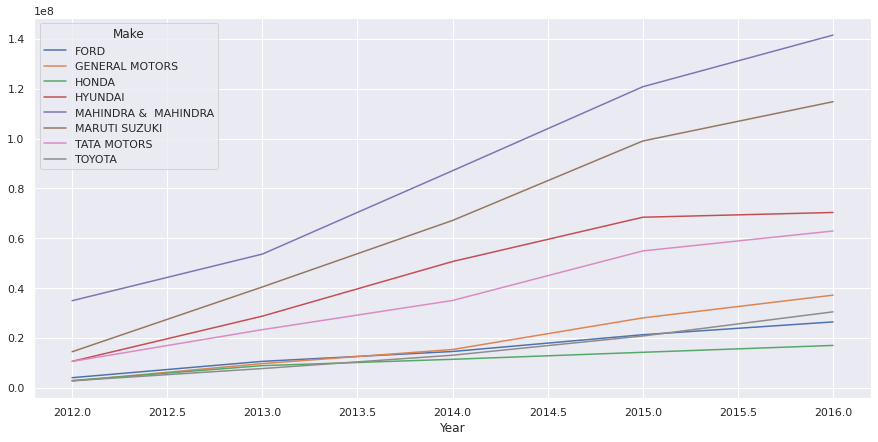

In [122]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['Year','Make']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)

<AxesSubplot:xlabel='Month'>

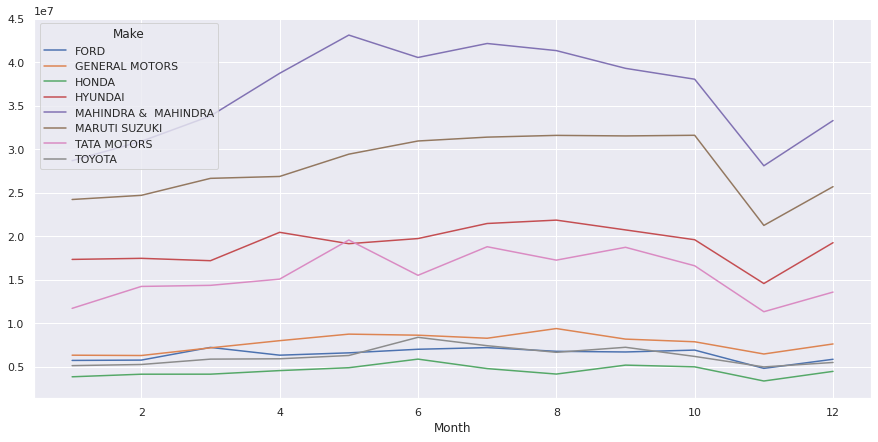

In [123]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['Month','Make']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)

<AxesSubplot:xlabel='Year'>

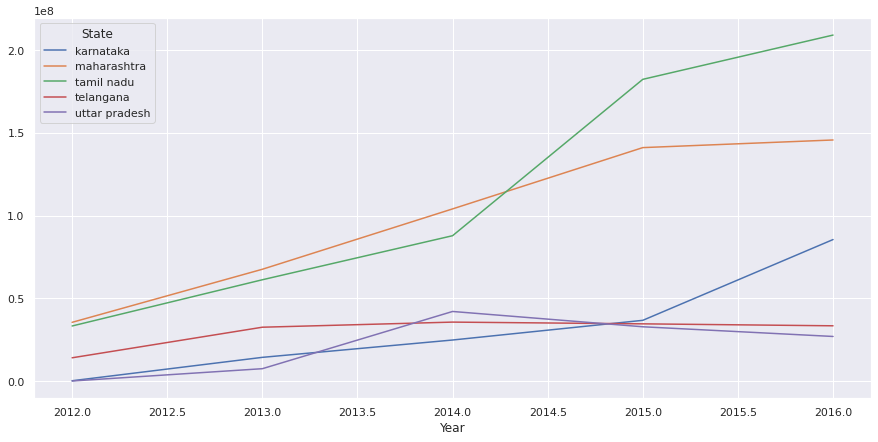

In [124]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['Year','State']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)

<AxesSubplot:xlabel='Month'>

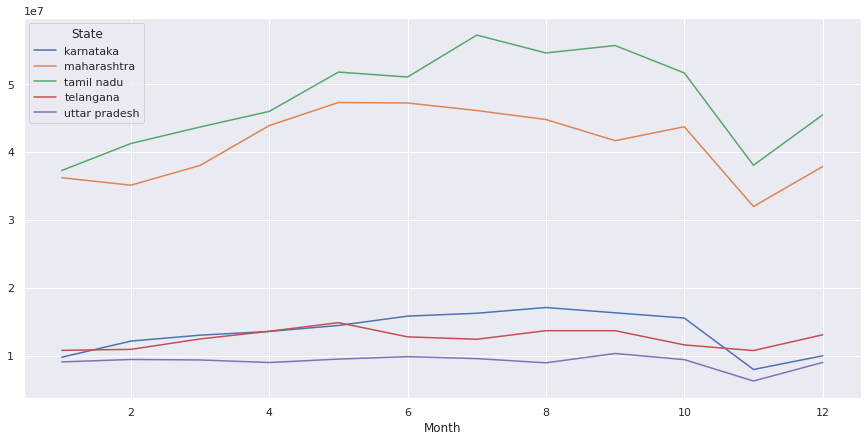

In [125]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['Month','State']).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)